In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
pd.options.display.float_format = '{:.3f}'.format

In [2]:
data = pd.read_parquet('files/train.parquet.gzip')
data

,user_id,item_id,timespent,reaction
0,707536,67950,0,0
1,707536,151002,0,0
2,707536,134736,0,0
3,707536,196151,0,0
4,707536,94182,0,0
...,...,...,...,...
144440010,849764,80910,0,0
144440011,993316,132328,0,0
144440012,993316,186701,0,0
144440013,666981,81857,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144440015 entries, 0 to 144440014
Data columns (total 4 columns):
 #   Column     Dtype
---  ------     -----
 0   user_id    int32
 1   item_id    int32
 2   timespent  int8 
 3   reaction   int8 
dtypes: int32(2), int8(2)
memory usage: 1.3 GB


In [97]:
data.loc[data['timespent'] >0]['timespent'].describe()

count   23579470.000
mean           3.336
std            2.863
min            1.000
25%            1.000
50%            2.000
75%            4.000
max           60.000
Name: timespent, dtype: float64

In [6]:
data['reaction'].value_counts()

 0    142978120
 1      1358069
-1       103826
Name: reaction, dtype: int64

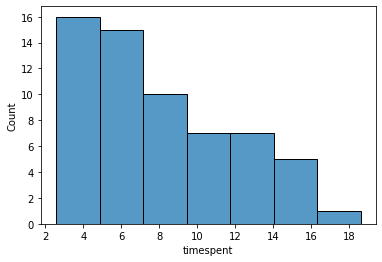

In [24]:
time_spent = data['timespent'].value_counts()
sns.histplot(data=np.log(time_spent));

In [25]:
#users_features
cou_items = data.groupby('user_id')['item_id'].nunique().astype('int32')
cou__items_with_time = data.groupby('user_id')['timespent'].nunique().astype('int16') - 1
cou_likes = data.loc[data['reaction'] == 1].groupby('user_id')['item_id'].nunique()
cou_dislikes = data.loc[data['reaction'] == -1].groupby('user_id')['item_id'].nunique()

In [38]:
def make_plot(data):
    data.plot(kind='box')
    plt.figure(figsize=(20,7))
    sns.histplot(data=data);
    plt.show()
    
    

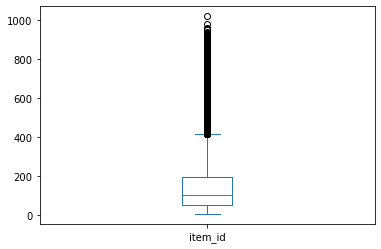

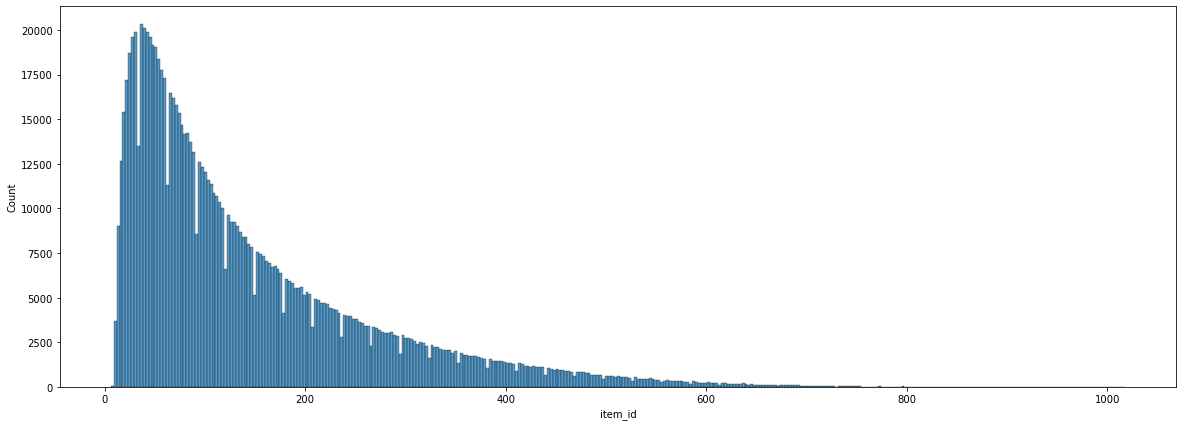

In [42]:
make_plot(cou_items)

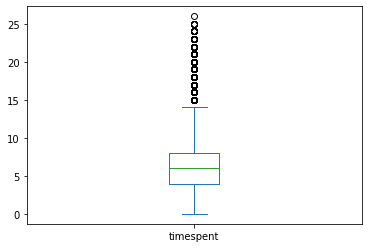

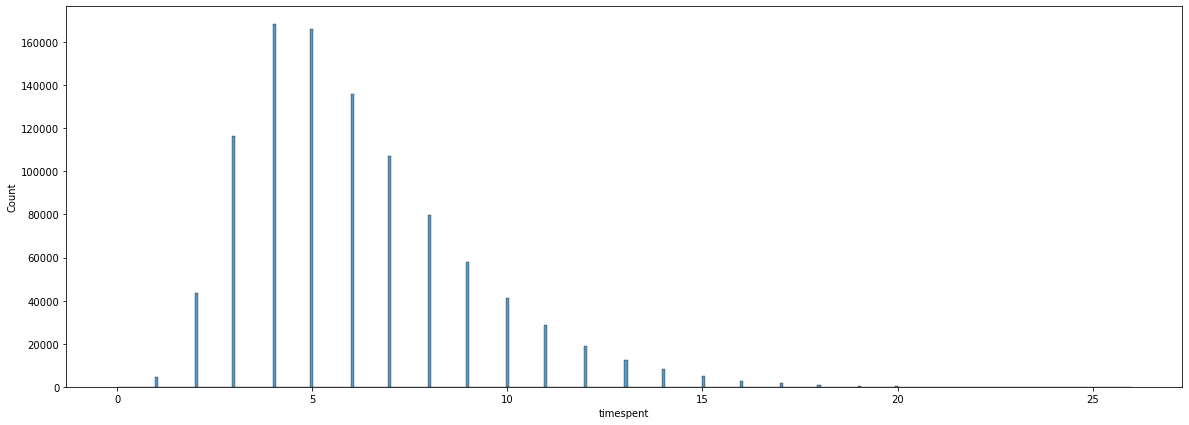

In [43]:
make_plot(cou__items_with_time)

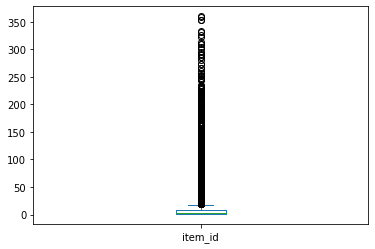

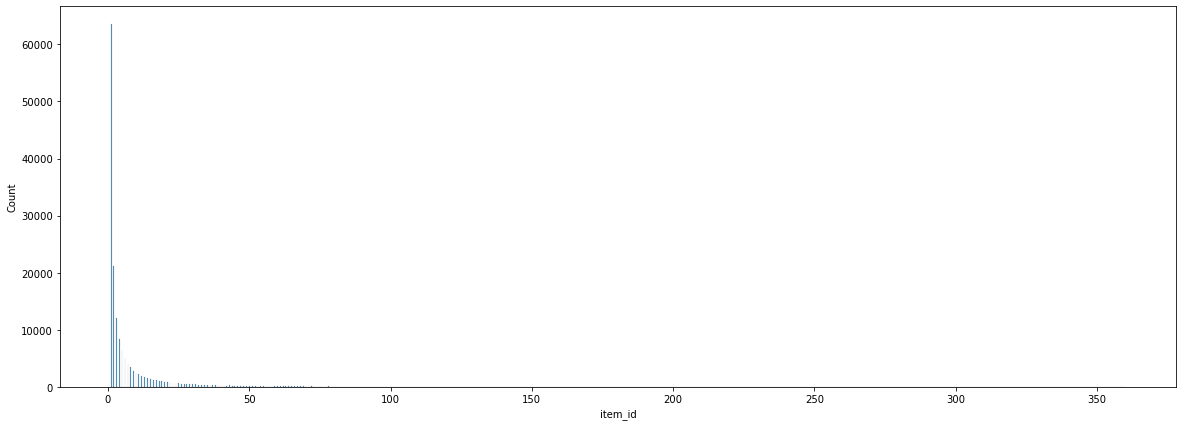

In [44]:
make_plot(cou_likes)

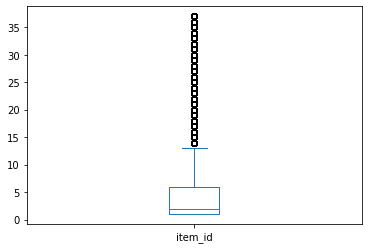

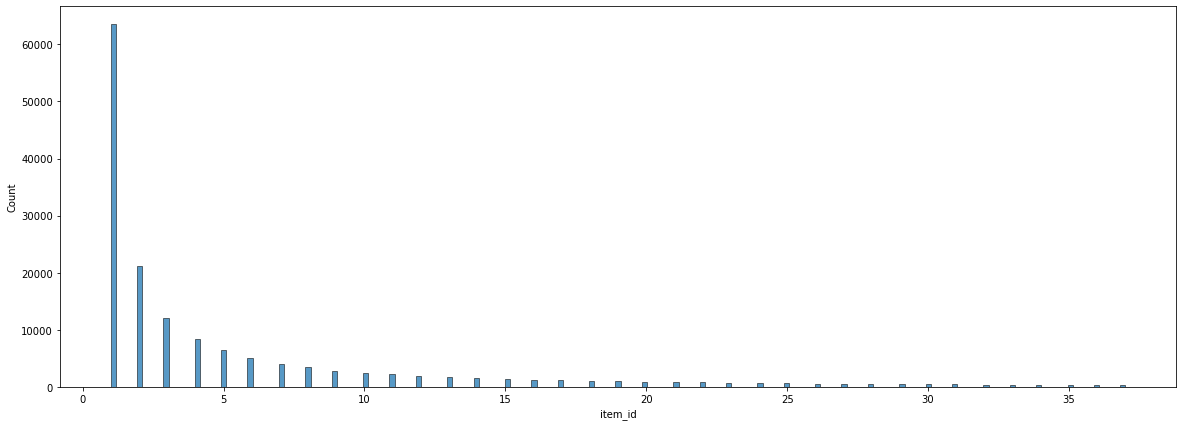

In [58]:
cou_likes_q95 = cou_likes[cou_likes < cou_likes.quantile(0.95)]
make_plot(cou_likes_q95)

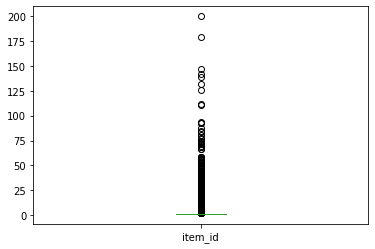

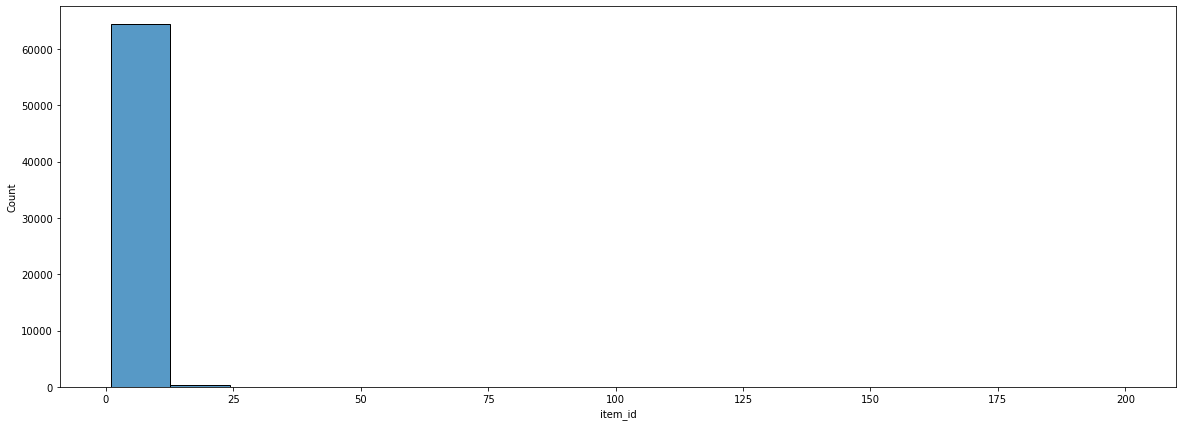

In [45]:
make_plot(cou_dislikes)

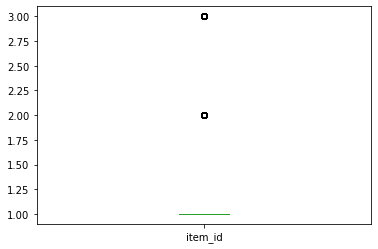

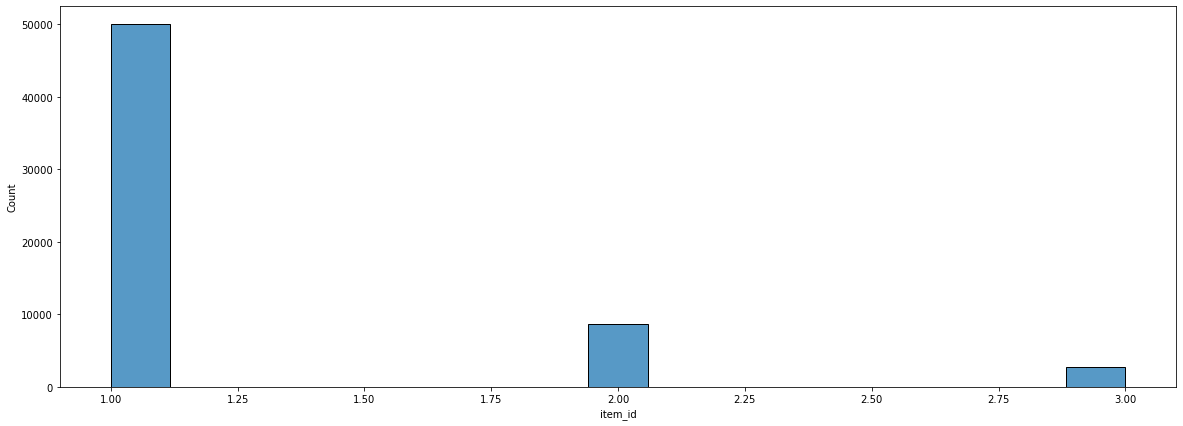

In [59]:
cou_dislikes_q95 = cou_dislikes[cou_dislikes < cou_dislikes.quantile(0.95)]
make_plot(cou_dislikes_q95)

In [46]:
#item_feature
cou_users = data.groupby('item_id')['user_id'].nunique().astype('int32')
cou__users_with_time = data.groupby('item_id')['timespent'].nunique().astype('int16') - 1
cou_likes_item = data.loc[data['reaction'] == 1].groupby('item_id')['user_id'].nunique()
cou_dislikes_item = data.loc[data['reaction'] == -1].groupby('item_id')['user_id'].nunique()

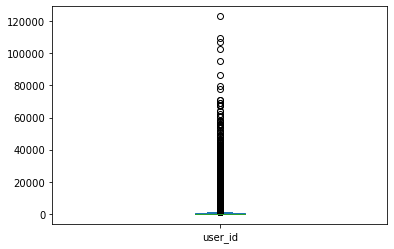

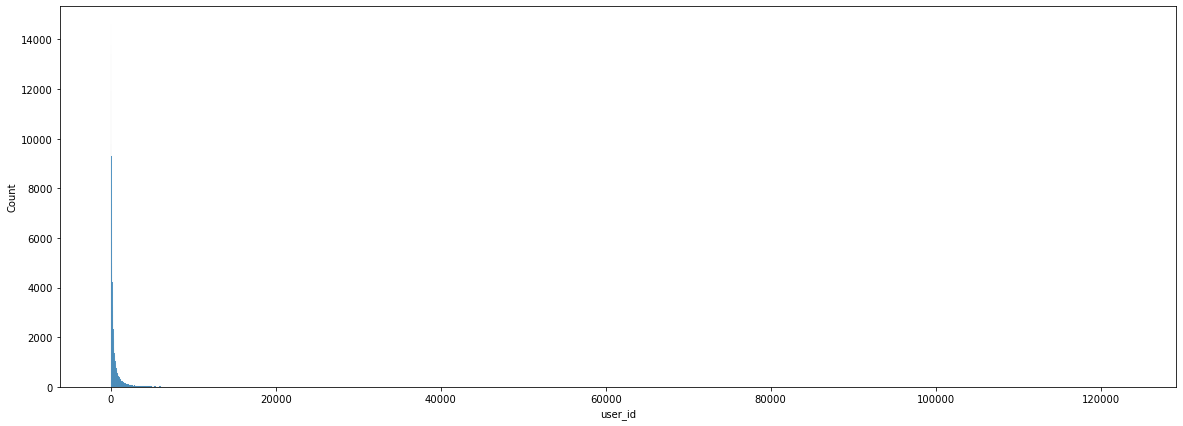

In [47]:
make_plot(cou_users)

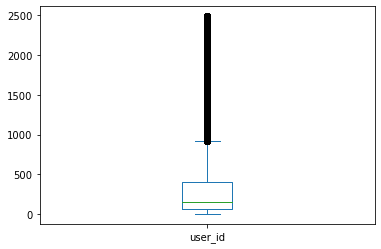

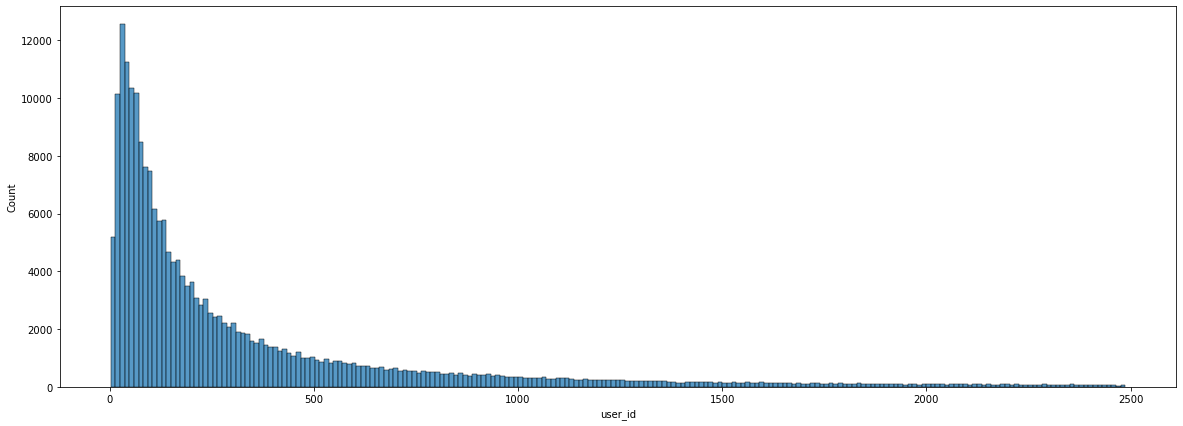

In [54]:
cou_users_q95 = cou_users[cou_users < cou_users.quantile(0.95)]
make_plot(cou_users_q95)

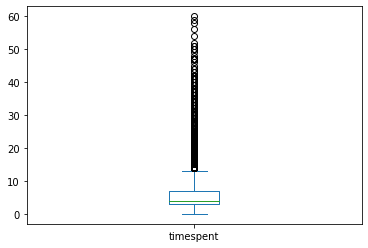

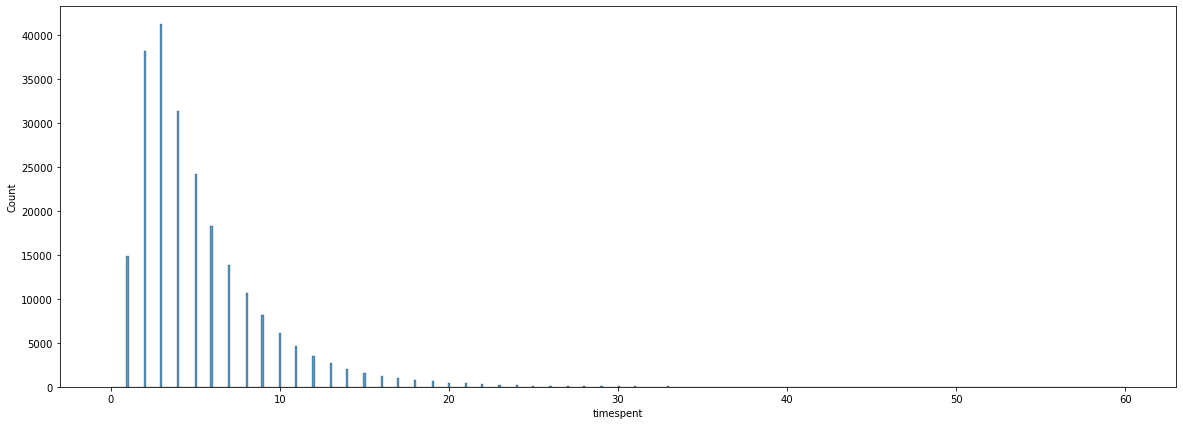

In [48]:
make_plot(cou__users_with_time)

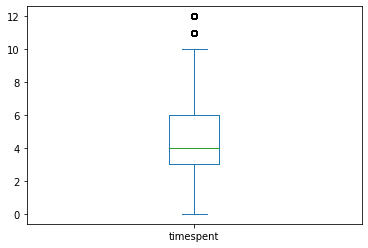

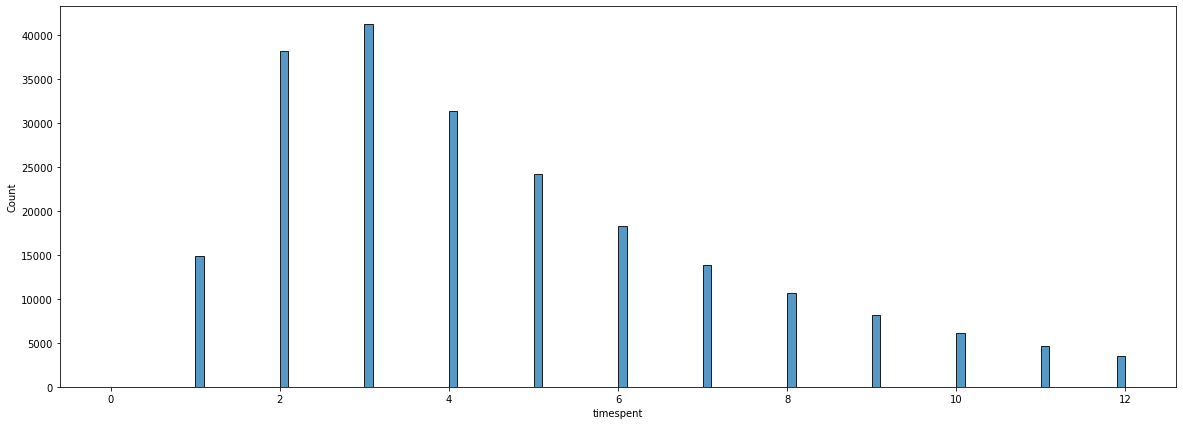

In [55]:
cou__users_with_time_q95 = cou__users_with_time[cou__users_with_time < cou__users_with_time.quantile(0.95)]
make_plot(cou__users_with_time_q95)

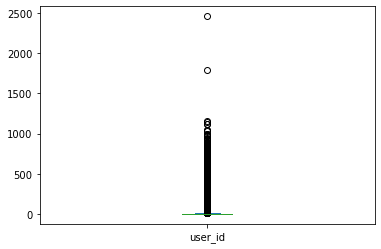

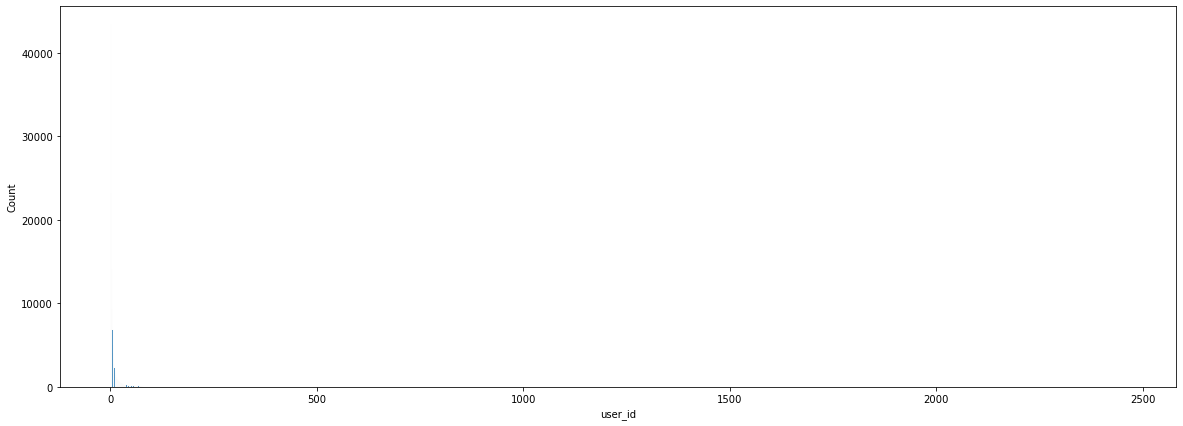

In [49]:
make_plot(cou_likes_item)

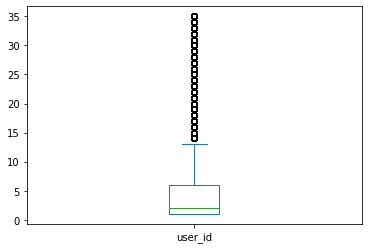

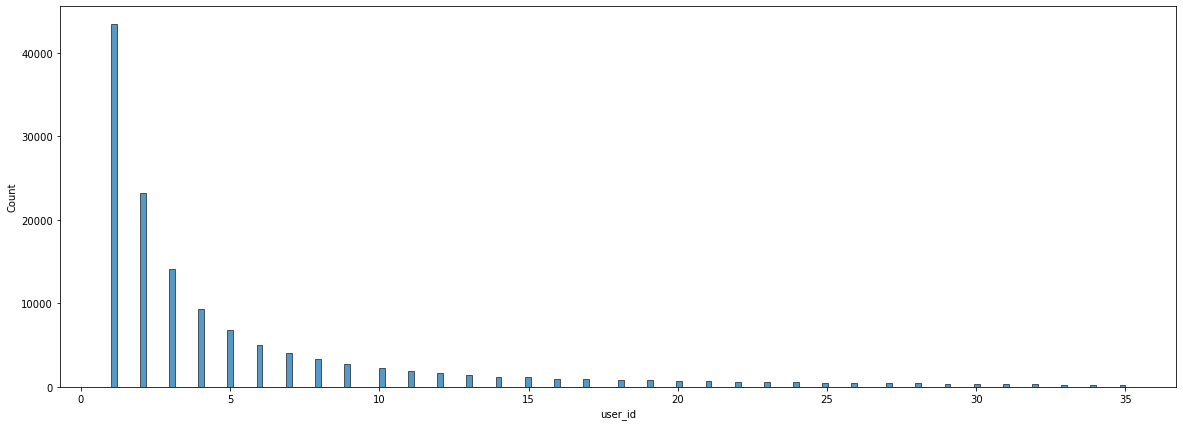

In [56]:
cou_likes_item_q95 = cou_likes_item[cou_likes_item < cou_likes_item.quantile(0.95)]
make_plot(cou_likes_item_q95)

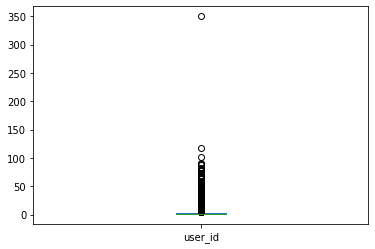

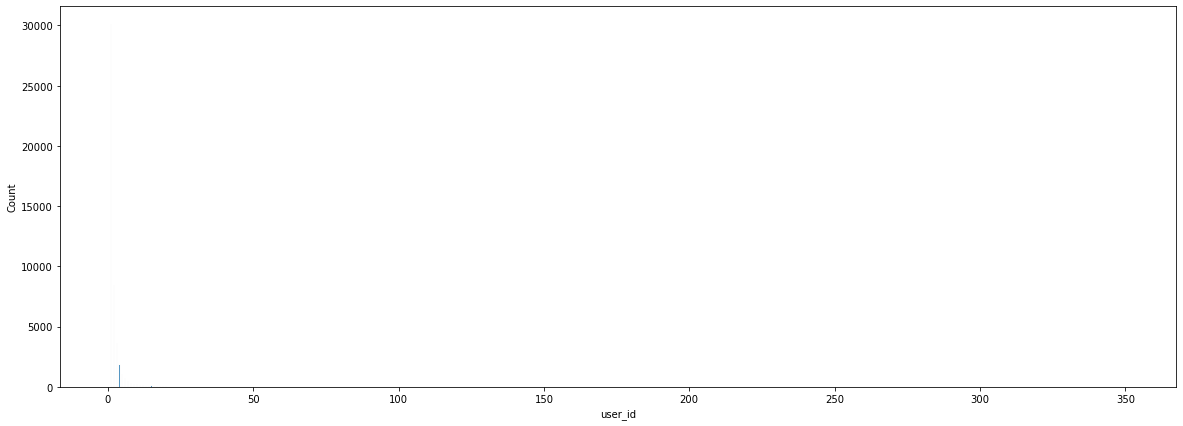

In [50]:
make_plot(cou_dislikes_item)

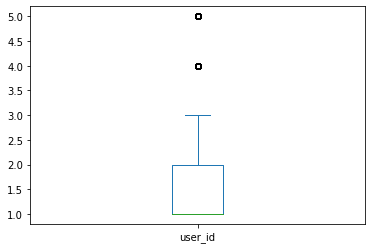

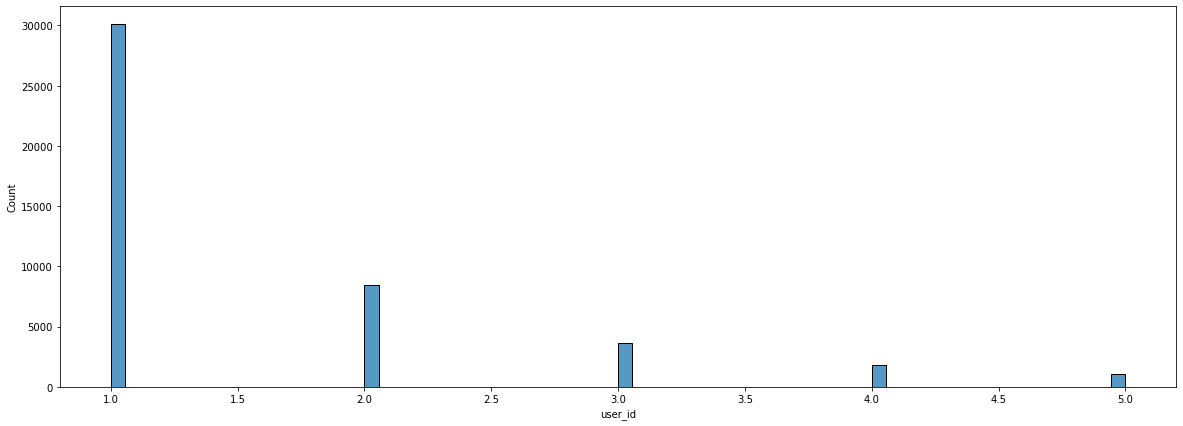

In [57]:
cou_dislikes_item_q95 = cou_dislikes_item[cou_dislikes_item < cou_dislikes_item.quantile(0.95)]
make_plot(cou_dislikes_item_q95)